In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data_m1 = pd.read_excel('data/M1.xlsx')

# Features (X) and target (y)
X_m1 = data_m1.drop('WPR', axis=1)
y_m1 = data_m1['WPR']

# Show the first 20 rows of the data
print(data_m1.head(20))

# Split data into training and testing sets
X_train_m1, X_test_m1, y_train_m1, y_test_m1 = train_test_split(X_m1, y_m1, test_size=0.2, random_state=42)

print("X_train_m1 shape:", X_train_m1.shape)
print("y_train_m1 shape:", y_train_m1.shape)


       Qa     Qc     Qd   Qhx   Ir     Qe       WPR
0   0.000  0.000  0.000  0.00    0  0.000  0.000000
1   0.000  0.000  0.000  0.00    0  0.000  0.000000
2   0.000  0.000  0.000  0.00    0  0.000  0.000000
3   0.000  0.000  0.000  0.00    0  0.000  0.000000
4   0.000  0.000  0.000  0.00    0  0.000  0.000000
5   0.000  0.000  0.000  0.00    0  0.000  0.000000
6   0.000  0.000  0.000  0.00    6  0.000  0.000000
7   0.000  0.000  0.000  0.00  122  0.000  0.000000
8   2.601  1.889  2.645  1.24  333  1.845  0.100440
9   5.770  4.702  5.911  1.70  517  4.560  1.051920
10  7.868  6.516  8.093  1.99  636  6.292  1.505088
11  8.792  7.302  9.057  2.11  670  7.037  1.938276
12  9.446  7.855  9.742  2.19  695  7.560  2.405268
13  8.669  7.198  8.928  2.09  634  6.938  2.019600
14  6.688  5.500  6.864  1.83  497  5.324  0.753840
15  3.562  2.751  3.632  1.39  302  2.681  0.000000
16  0.000  0.000  0.000  0.00   91  0.000  0.000000
17  0.000  0.000  0.000  0.00    2  0.000  0.000000
18  0.000  0

In [2]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


# Scale the features
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_m1_scaled = scaler.fit_transform(X_train_m1)
X_test_m1_scaled = scaler.transform(X_test_m1)

# Reshape the input to be 3D [samples, timesteps, features]
X_train_m1_lstm = np.reshape(X_train_m1_scaled, (X_train_m1_scaled.shape[0], 1, X_train_m1_scaled.shape[1]))
X_test_m1_lstm = np.reshape(X_test_m1_scaled, (X_test_m1_scaled.shape[0], 1, X_test_m1_scaled.shape[1]))

print("X_train_m1_lstm shape:", X_train_m1_lstm.shape)
print("X_test_m1_lstm shape:", X_test_m1_lstm.shape)


2024-09-02 16:50:59.537177: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-02 16:51:01.237284: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-02 16:51:01.243315: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-02 16:51:11.076815: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


X_train_m1_lstm shape: (7008, 1, 6)
X_test_m1_lstm shape: (1752, 1, 6)


In [3]:
# Build the baseline LSTM model
baseline_lstm_model = Sequential()

# Add the LSTM layer
baseline_lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_m1_lstm.shape[1], X_train_m1_lstm.shape[2])))
baseline_lstm_model.add(Dropout(0.2))  # Dropout to prevent overfitting

# Add another LSTM layer
baseline_lstm_model.add(LSTM(units=50, return_sequences=False))
baseline_lstm_model.add(Dropout(0.2))

# Add the output layer
baseline_lstm_model.add(Dense(1))

# Compile the model
baseline_lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the baseline LSTM model
baseline_lstm_model.fit(X_train_m1_lstm, y_train_m1, epochs=20, batch_size=32, validation_data=(X_test_m1_lstm, y_test_m1), verbose=1)

# Predict on the training and test data
y_train_pred_lstm_baseline = baseline_lstm_model.predict(X_train_m1_lstm)
y_test_pred_lstm_baseline = baseline_lstm_model.predict(X_test_m1_lstm)

# Save predictions vs. ground truth to Excel
baseline_lstm_train_results = pd.DataFrame({'Ground Truth': y_train_m1, 'Prediction': y_train_pred_lstm_baseline.flatten()})
baseline_lstm_test_results = pd.DataFrame({'Ground Truth': y_test_m1, 'Prediction': y_test_pred_lstm_baseline.flatten()})

baseline_lstm_train_results.to_excel('outputs/baseline_lstm_train_predictions.xlsx', index=False)
baseline_lstm_test_results.to_excel('outputs/baseline_lstm_test_predictions.xlsx', index=False)


2024-09-02 16:51:16.875057: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Epoch 1/20
219/219 [==============================] - 18s 38ms/step - loss: 0.8273 - val_loss: 0.6503
Epoch 2/20
219/219 [==============================] - 7s 34ms/step - loss: 0.7607 - val_loss: 0.6636
Epoch 3/20
219/219 [==============================] - 7s 34ms/step - loss: 0.7555 - val_loss: 0.6556
Epoch 4/20
219/219 [==============================] - 4s 19ms/step - loss: 0.7531 - val_loss: 0.6446
Epoch 5/20
219/219 [==============================] - 3s 12ms/step - loss: 0.7507 - val_loss: 0.6512
Epoch 6/20
219/219 [==============================] - 3s 12ms/step - loss: 0.7507 - val_loss: 0.6419
Epoch 7/20
219/219 [==============================] - 3s 15ms/step - loss: 0.7475 - val_loss: 0.6384
Epoch 8/20
219/219 [==============================] - 3s 15ms/step - loss: 0.7398 - val_loss: 0.6362
Epoch 9/20
219/219 [==============================] - 3s 13ms/step - loss: 0.7409 - val_loss: 0.6378
Epoch 10/20
219/219 [==============================] - 3s 15ms/step - loss: 0.7425 - val_l

In [4]:
from pyswarm import pso  # This is a placeholder, replace with actual PSO implementation

# Define the fitness function for LSTM model
def lstm_fitness_function(params):
    # Unpack parameters
    lstm_units = int(params[0])
    dropout_rate = params[1]
    learning_rate = params[2]
    batch_size = int(params[3])
    
    # Build the LSTM model with the parameters
    model = Sequential()
    model.add(LSTM(units=lstm_units, return_sequences=True, input_shape=(X_train_m1_lstm.shape[1], X_train_m1_lstm.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=lstm_units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    
    # Train the model
    model.fit(X_train_m1_lstm, y_train_m1, epochs=10, batch_size=batch_size, verbose=0)
    
    # Evaluate on validation set
    y_pred = model.predict(X_test_m1_lstm)
    mse = mean_squared_error(y_test_m1, y_pred)
    
    return mse

# Set the bounds for parameters: [lstm_units, dropout_rate, learning_rate, batch_size]
bounds = ([10, 0.1, 0.0001, 16], [100, 0.5, 0.01, 128])

# Run the PSO
best_params, best_mse = pso(lstm_fitness_function, bounds[0], bounds[1], swarmsize=20, maxiter=10)

print(f'Optimized Parameters (PSO): lstm_units = {int(best_params[0])}, dropout_rate = {best_params[1]}, learning_rate = {best_params[2]}, batch_size = {int(best_params[3])}')
print(f'Best MSE achieved: {best_mse}')


55/55 [==============================] - 1s 2ms/step
Stopping search: maximum iterations reached --> 10
Optimized Parameters (PSO): lstm_units = 100, dropout_rate = 0.1, learning_rate = 0.009061625299078394, batch_size = 52
Best MSE achieved: 0.594499901737335


In [5]:
# Train the LSTM model with the optimized parameters
optimized_lstm_model = Sequential()
optimized_lstm_model.add(LSTM(units=int(best_params[0]), return_sequences=True, input_shape=(X_train_m1_lstm.shape[1], X_train_m1_lstm.shape[2])))
optimized_lstm_model.add(Dropout(best_params[1]))
optimized_lstm_model.add(LSTM(units=int(best_params[0])))
optimized_lstm_model.add(Dropout(best_params[1]))
optimized_lstm_model.add(Dense(1))

optimizer = tf.keras.optimizers.Adam(learning_rate=best_params[2])
optimized_lstm_model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the optimized model
optimized_lstm_model.fit(X_train_m1_lstm, y_train_m1, epochs=20, batch_size=int(best_params[3]), verbose=1)

# Make predictions
y_train_pred_lstm_optimized = optimized_lstm_model.predict(X_train_m1_lstm)
y_test_pred_lstm_optimized = optimized_lstm_model.predict(X_test_m1_lstm)

# Save predictions vs. ground truth to Excel
optimized_lstm_train_results = pd.DataFrame({'Ground Truth': y_train_m1, 'Prediction': y_train_pred_lstm_optimized.flatten()})
optimized_lstm_test_results = pd.DataFrame({'Ground Truth': y_test_m1, 'Prediction': y_test_pred_lstm_optimized.flatten()})

optimized_lstm_train_results.to_excel('outputs/optimized_lstm_train_predictions_pso.xlsx', index=False)
optimized_lstm_test_results.to_excel('outputs/optimized_lstm_test_predictions_pso.xlsx', index=False)


Epoch 1/20
135/135 [==============================] - 5s 7ms/step - loss: 0.7916
Epoch 2/20
135/135 [==============================] - 1s 6ms/step - loss: 0.7636
Epoch 3/20
135/135 [==============================] - 1s 8ms/step - loss: 0.7624
Epoch 4/20
135/135 [==============================] - 1s 6ms/step - loss: 0.7411
Epoch 5/20
135/135 [==============================] - 1s 6ms/step - loss: 0.7196
Epoch 6/20
135/135 [==============================] - 1s 6ms/step - loss: 0.7210
Epoch 7/20
135/135 [==============================] - 1s 6ms/step - loss: 0.7185
Epoch 8/20
135/135 [==============================] - 1s 6ms/step - loss: 0.7012
Epoch 9/20
135/135 [==============================] - 1s 6ms/step - loss: 0.6979
Epoch 10/20
135/135 [==============================] - 1s 7ms/step - loss: 0.6895
Epoch 11/20
135/135 [==============================] - 1s 6ms/step - loss: 0.6919
Epoch 12/20
135/135 [==============================] - 1s 9ms/step - loss: 0.6982
Epoch 13/20
135/135 [====

55/55 [==============================] - 2s 6ms/step
 The best solution found:                                                                           
 [7.64298769e+01 2.52903339e-01 5.37689269e-03 2.05149947e+01]

 Objective function:
 0.5964973436092521


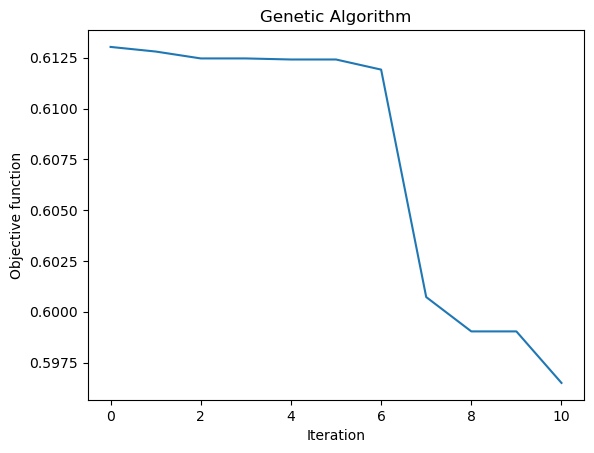

Optimized Parameters (GA): lstm_units = 76, dropout_rate = 0.25290333922644315, learning_rate = 0.005376892691117486, batch_size = 20


In [7]:
from geneticalgorithm import geneticalgorithm as ga

# Define the fitness function for LSTM model
def lstm_fitness_function_ga(params):
    lstm_units = int(params[0])
    dropout_rate = params[1]
    learning_rate = params[2]
    batch_size = int(params[3])

    model = Sequential()
    model.add(LSTM(units=lstm_units, return_sequences=True, input_shape=(X_train_m1_lstm.shape[1], X_train_m1_lstm.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=lstm_units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    
    model.fit(X_train_m1_lstm, y_train_m1, epochs=10, batch_size=batch_size, verbose=0)
    
    y_pred = model.predict(X_test_m1_lstm)
    mse = mean_squared_error(y_test_m1, y_pred)
    
    return mse

# Set the bounds for GA: [lstm_units, dropout_rate, learning_rate, batch_size]
varbound = np.array([[10, 100], [0.1, 0.5], [0.0001, 0.01], [16, 128]])

algorithm_param = {'max_num_iteration': 100, 'population_size': 50, 'mutation_probability': 0.1, 'elit_ratio': 0.01, 'crossover_probability': 0.5, 'parents_portion': 0.3, 'crossover_type':'uniform', 'max_iteration_without_improv':10}

model = model = ga(function=lstm_fitness_function_ga, 
           dimension=4, 
           variable_type='real', 
           variable_boundaries=varbound, 
           algorithm_parameters=algorithm_param,
           function_timeout=300)  # Increase the timeout

model.run()

best_params_ga = model.output_dict['variable']

print(f'Optimized Parameters (GA): lstm_units = {int(best_params_ga[0])}, dropout_rate = {best_params_ga[1]}, learning_rate = {best_params_ga[2]}, batch_size = {int(best_params_ga[3])}')


In [8]:
# Train the LSTM model with the GA-optimized parameters
optimized_lstm_model_ga = Sequential()
optimized_lstm_model_ga.add(LSTM(units=int(best_params_ga[0]), return_sequences=True, input_shape=(X_train_m1_lstm.shape[1], X_train_m1_lstm.shape[2])))
optimized_lstm_model_ga.add(Dropout(best_params_ga[1]))
optimized_lstm_model_ga.add(LSTM(units=int(best_params_ga[0])))
optimized_lstm_model_ga.add(Dropout(best_params_ga[1]))
optimized_lstm_model_ga.add(Dense(1))

optimizer = tf.keras.optimizers.Adam(learning_rate=best_params_ga[2])
optimized_lstm_model_ga.compile(optimizer=optimizer, loss='mean_squared_error')

optimized_lstm_model_ga.fit(X_train_m1_lstm, y_train_m1, epochs=20, batch_size=int(best_params_ga[3]), verbose=1)

# Make predictions
y_train_pred_lstm_ga = optimized_lstm_model_ga.predict(X_train_m1_lstm)
y_test_pred_lstm_ga = optimized_lstm_model_ga.predict(X_test_m1_lstm)

# Save predictions vs. ground truth to Excel
optimized_lstm_train_results_ga = pd.DataFrame({'Ground Truth': y_train_m1, 'Prediction': y_train_pred_lstm_ga.flatten()})
optimized_lstm_test_results_ga = pd.DataFrame({'Ground Truth': y_test_m1, 'Prediction': y_test_pred_lstm_ga.flatten()})

optimized_lstm_train_results_ga.to_excel('outputs/optimized_lstm_train_predictions_ga.xlsx', index=False)
optimized_lstm_test_results_ga.to_excel('outputs/optimized_lstm_test_predictions_ga.xlsx', index=False)


Epoch 1/20
351/351 [==============================] - 25s 8ms/step - loss: 0.7846
Epoch 2/20
351/351 [==============================] - 3s 8ms/step - loss: 0.7585
Epoch 3/20
351/351 [==============================] - 3s 9ms/step - loss: 0.7584
Epoch 4/20
351/351 [==============================] - 3s 7ms/step - loss: 0.7495
Epoch 5/20
351/351 [==============================] - 3s 8ms/step - loss: 0.7439
Epoch 6/20
351/351 [==============================] - 3s 8ms/step - loss: 0.7361
Epoch 7/20
351/351 [==============================] - 3s 9ms/step - loss: 0.7133
Epoch 8/20
351/351 [==============================] - 3s 9ms/step - loss: 0.7202
Epoch 9/20
351/351 [==============================] - 3s 9ms/step - loss: 0.7158
Epoch 10/20
351/351 [==============================] - 3s 8ms/step - loss: 0.7039
Epoch 11/20
351/351 [==============================] - 3s 8ms/step - loss: 0.6988
Epoch 12/20
351/351 [==============================] - 3s 7ms/step - loss: 0.6955
Epoch 13/20
351/351 [===

In [16]:
print(X_train_m1_lstm.shape)


(7008, 1, 6)


In [9]:
from niapy.algorithms.basic import HarrisHawksOptimization
from niapy.task import Task
from niapy.problems import Problem
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping

def create_lstm_model(units, dropout_rate):
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=True, input_shape=(1, 6)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

X_train_m1_lstm = X_train_m1_scaled.reshape((X_train_m1_scaled.shape[0], 1, X_train_m1_scaled.shape[1]))
X_test_m1_lstm = X_test_m1_scaled.reshape((X_test_m1_scaled.shape[0], 1, X_test_m1_scaled.shape[1]))

class CustomLSTMBenchmark(Problem):
    def __init__(self):
        super().__init__(dimension=2, lower=[10, 0.1], upper=[100, 0.5])

    def _evaluate(self, x):
        units = int(x[0])  # Ensure units is an integer
        dropout_rate = x[1]
        
        lstm_model = create_lstm_model(units=units, dropout_rate=dropout_rate)
        
        # Use early stopping to reduce training time
        early_stopping = EarlyStopping(monitor='loss', patience=3, verbose=0)
        
        lstm_model.fit(X_train_m1_lstm, y_train_m1, epochs=20, batch_size=32, verbose=0, callbacks=[early_stopping])
        
        y_pred = lstm_model.predict(X_test_m1_lstm)
        return mean_squared_error(y_test_m1, y_pred.flatten())

task = Task(problem=CustomLSTMBenchmark(), max_evals=30)  # Reduced evaluations
algo = HarrisHawksOptimization(population_size=10)  # Reduced population size

best_params_hho, best_loss = algo.run(task)

# Extracting the parameters from the first element of the tuple
best_units_hho = int(best_params_hho[0])
best_dropout_rate_hho = best_params_hho[1]

print(f"Optimized Parameters (HHO): lstm_units = {best_units_hho}, dropout_rate = {best_dropout_rate_hho}")

# Train LSTM with HHO optimized parameters
lstm_hho_model = create_lstm_model(units=best_units_hho, dropout_rate=best_dropout_rate_hho)
lstm_hho_model.fit(X_train_m1_lstm, y_train_m1, epochs=2, batch_size=32, verbose=0)

y_train_pred_hho = lstm_hho_model.predict(X_train_m1_lstm)
y_test_pred_hho = lstm_hho_model.predict(X_test_m1_lstm)

# Save the predictions
results_train_hho = pd.DataFrame({'GroundTruth': y_train_m1, 'Predictions': y_train_pred_hho.flatten()})
results_test_hho = pd.DataFrame({'GroundTruth': y_test_m1, 'Predictions': y_test_pred_hho.flatten()})

results_train_hho.to_excel('outputs/lstm_hho_train_predictions_hho.xlsx', index=False)
results_test_hho.to_excel('outputs/lstm_hho_test_predictions_hho.xlsx', index=False)


55/55 [==============================] - 2s 7ms/step
Optimized Parameters (HHO): lstm_units = 47, dropout_rate = 0.1
55/55 [==============================] - 2s 6ms/step


In [5]:
import optuna
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the LSTM model creation function
def create_lstm_model(units, dropout_rate):
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=False, input_shape=(1, X_train_m1_lstm.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))  # Assuming your output is a single continuous value
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Reshape input data to 3D for LSTM
X_train_m1_lstm = X_train_m1_scaled.reshape((X_train_m1_scaled.shape[0], 1, X_train_m1_scaled.shape[1]))
X_test_m1_lstm = X_test_m1_scaled.reshape((X_test_m1_scaled.shape[0], 1, X_test_m1_scaled.shape[1]))

# Objective function for BBO
def bbo_lstm_objective(trial):
    units = trial.suggest_int("units", 10, 100)
    dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.5)
    
    lstm_model = create_lstm_model(units=units, dropout_rate=dropout_rate)
    lstm_model.fit(X_train_m1_lstm, y_train_m1, epochs=50, batch_size=32, verbose=0)
    
    y_pred = lstm_model.predict(X_test_m1_lstm)
    return mean_squared_error(y_test_m1, y_pred.flatten())

# Create and optimize study
study = optuna.create_study(direction="minimize")
study.optimize(bbo_lstm_objective, n_trials=30)

# Retrieve best parameters
best_units_bbo = study.best_params["units"]
best_dropout_rate_bbo = study.best_params["dropout_rate"]

# Train LSTM with BBO optimized parameters
lstm_bbo_model = create_lstm_model(units=best_units_bbo, dropout_rate=best_dropout_rate_bbo)
lstm_bbo_model.fit(X_train_m1_lstm, y_train_m1, epochs=50, batch_size=32, verbose=0)

# Make predictions
y_train_pred_bbo = lstm_bbo_model.predict(X_train_m1_lstm)
y_test_pred_bbo = lstm_bbo_model.predict(X_test_m1_lstm)

# Save the predictions
results_train_bbo = pd.DataFrame({'GroundTruth': y_train_m1, 'Predictions': y_train_pred_bbo.flatten()})
results_test_bbo = pd.DataFrame({'GroundTruth': y_test_m1, 'Predictions': y_test_pred_bbo.flatten()})

results_train_bbo.to_excel('outputs/lstm_bbo_train_predictions.xlsx', index=False)
results_test_bbo.to_excel('outputs/lstm_bbo_test_predictions.xlsx', index=False)


[I 2024-09-02 16:59:11,023] A new study created in memory with name: no-name-048f65e2-9b6b-46f2-83c2-0f9bec1b2e45


55/55 [==============================] - 2s 9ms/step


[I 2024-09-02 17:00:44,635] Trial 0 finished with value: 0.6193000270118493 and parameters: {'units': 27, 'dropout_rate': 0.19290107525704225}. Best is trial 0 with value: 0.6193000270118493.


55/55 [==============================] - 2s 10ms/step


[I 2024-09-02 17:02:30,131] Trial 1 finished with value: 0.616787556386968 and parameters: {'units': 81, 'dropout_rate': 0.22592647098912885}. Best is trial 1 with value: 0.616787556386968.


55/55 [==============================] - 2s 8ms/step


[I 2024-09-02 17:04:02,055] Trial 2 finished with value: 0.6198152559898225 and parameters: {'units': 17, 'dropout_rate': 0.17510423233950415}. Best is trial 1 with value: 0.616787556386968.


55/55 [==============================] - 2s 9ms/step


[I 2024-09-02 17:05:36,199] Trial 3 finished with value: 0.6178862198156558 and parameters: {'units': 49, 'dropout_rate': 0.3017686888250678}. Best is trial 1 with value: 0.616787556386968.


55/55 [==============================] - 2s 9ms/step


[I 2024-09-02 17:07:10,204] Trial 4 finished with value: 0.6207096824822149 and parameters: {'units': 48, 'dropout_rate': 0.4122273184696782}. Best is trial 1 with value: 0.616787556386968.


55/55 [==============================] - 2s 5ms/step


[I 2024-09-02 17:08:37,274] Trial 5 finished with value: 0.6220503183480063 and parameters: {'units': 51, 'dropout_rate': 0.3224397060185198}. Best is trial 1 with value: 0.616787556386968.


55/55 [==============================] - 1s 5ms/step


[I 2024-09-02 17:09:52,420] Trial 6 finished with value: 0.6180803810874532 and parameters: {'units': 80, 'dropout_rate': 0.42106260956444574}. Best is trial 1 with value: 0.616787556386968.


55/55 [==============================] - 1s 4ms/step


[I 2024-09-02 17:10:55,979] Trial 7 finished with value: 0.6154991322050799 and parameters: {'units': 34, 'dropout_rate': 0.2016035474180319}. Best is trial 7 with value: 0.6154991322050799.


55/55 [==============================] - 1s 5ms/step


[I 2024-09-02 17:12:06,778] Trial 8 finished with value: 0.6194569452185072 and parameters: {'units': 83, 'dropout_rate': 0.13984284900650368}. Best is trial 7 with value: 0.6154991322050799.


55/55 [==============================] - 1s 5ms/step


[I 2024-09-02 17:13:07,939] Trial 9 finished with value: 0.6168205898621401 and parameters: {'units': 26, 'dropout_rate': 0.2875330256804518}. Best is trial 7 with value: 0.6154991322050799.


55/55 [==============================] - 2s 9ms/step


[I 2024-09-02 17:14:32,837] Trial 10 finished with value: 0.6198552869083199 and parameters: {'units': 97, 'dropout_rate': 0.49190206056826136}. Best is trial 7 with value: 0.6154991322050799.


55/55 [==============================] - 2s 12ms/step


[I 2024-09-02 17:16:04,778] Trial 11 finished with value: 0.622984699228768 and parameters: {'units': 72, 'dropout_rate': 0.23554350697044535}. Best is trial 7 with value: 0.6154991322050799.


55/55 [==============================] - 1s 5ms/step


[I 2024-09-02 17:17:19,150] Trial 12 finished with value: 0.6250899910973282 and parameters: {'units': 65, 'dropout_rate': 0.12055879935185097}. Best is trial 7 with value: 0.6154991322050799.


55/55 [==============================] - 1s 5ms/step


[I 2024-09-02 17:18:16,995] Trial 13 finished with value: 0.6157937459143344 and parameters: {'units': 31, 'dropout_rate': 0.24961893266463037}. Best is trial 7 with value: 0.6154991322050799.


55/55 [==============================] - 1s 6ms/step


[I 2024-09-02 17:19:16,769] Trial 14 finished with value: 0.6151696529206305 and parameters: {'units': 35, 'dropout_rate': 0.2551310456008211}. Best is trial 14 with value: 0.6151696529206305.


55/55 [==============================] - 1s 5ms/step


[I 2024-09-02 17:20:17,372] Trial 15 finished with value: 0.6212863201313206 and parameters: {'units': 38, 'dropout_rate': 0.3441570517890099}. Best is trial 14 with value: 0.6151696529206305.


55/55 [==============================] - 1s 3ms/step


[I 2024-09-02 17:21:00,462] Trial 16 finished with value: 0.6155732446431755 and parameters: {'units': 16, 'dropout_rate': 0.17238481786647908}. Best is trial 14 with value: 0.6151696529206305.


55/55 [==============================] - 1s 3ms/step


[I 2024-09-02 17:21:45,878] Trial 17 finished with value: 0.6155907717448135 and parameters: {'units': 39, 'dropout_rate': 0.3645713929401039}. Best is trial 14 with value: 0.6151696529206305.


55/55 [==============================] - 1s 3ms/step


[I 2024-09-02 17:22:25,719] Trial 18 finished with value: 0.6160678220319517 and parameters: {'units': 10, 'dropout_rate': 0.2691414826530318}. Best is trial 14 with value: 0.6151696529206305.


55/55 [==============================] - 1s 3ms/step


[I 2024-09-02 17:23:11,855] Trial 19 finished with value: 0.6183425973483612 and parameters: {'units': 62, 'dropout_rate': 0.21378406916450865}. Best is trial 14 with value: 0.6151696529206305.


55/55 [==============================] - 1s 3ms/step


[I 2024-09-02 17:23:54,445] Trial 20 finished with value: 0.634204808660602 and parameters: {'units': 40, 'dropout_rate': 0.13514975663689277}. Best is trial 14 with value: 0.6151696529206305.


55/55 [==============================] - 1s 4ms/step


[I 2024-09-02 17:24:35,134] Trial 21 finished with value: 0.6143583725318751 and parameters: {'units': 18, 'dropout_rate': 0.17278453028916627}. Best is trial 21 with value: 0.6143583725318751.


55/55 [==============================] - 2s 6ms/step


[I 2024-09-02 17:25:23,327] Trial 22 finished with value: 0.617001784002883 and parameters: {'units': 22, 'dropout_rate': 0.16581138162108247}. Best is trial 21 with value: 0.6143583725318751.


55/55 [==============================] - 2s 6ms/step


[I 2024-09-02 17:26:36,545] Trial 23 finished with value: 0.6364072747071592 and parameters: {'units': 32, 'dropout_rate': 0.2040078942260639}. Best is trial 21 with value: 0.6143583725318751.


55/55 [==============================] - 1s 6ms/step


[I 2024-09-02 17:27:40,420] Trial 24 finished with value: 0.6125256695284728 and parameters: {'units': 10, 'dropout_rate': 0.2578008004281273}. Best is trial 24 with value: 0.6125256695284728.


55/55 [==============================] - 1s 5ms/step


[I 2024-09-02 17:28:40,874] Trial 25 finished with value: 0.6120825705376208 and parameters: {'units': 12, 'dropout_rate': 0.10022513474581862}. Best is trial 25 with value: 0.6120825705376208.


55/55 [==============================] - 1s 8ms/step


[I 2024-09-02 17:29:43,524] Trial 26 finished with value: 0.6203807668969836 and parameters: {'units': 11, 'dropout_rate': 0.10553205525966941}. Best is trial 25 with value: 0.6120825705376208.


55/55 [==============================] - 2s 9ms/step


[I 2024-09-02 17:30:56,183] Trial 27 finished with value: 0.6219117470297392 and parameters: {'units': 19, 'dropout_rate': 0.14918969976772245}. Best is trial 25 with value: 0.6120825705376208.


55/55 [==============================] - 2s 4ms/step


[I 2024-09-02 17:32:32,489] Trial 28 finished with value: 0.6133632988390728 and parameters: {'units': 11, 'dropout_rate': 0.11164432301846859}. Best is trial 25 with value: 0.6120825705376208.


55/55 [==============================] - 2s 8ms/step


[I 2024-09-02 17:34:04,571] Trial 29 finished with value: 0.6183785246981112 and parameters: {'units': 25, 'dropout_rate': 0.10033135848157035}. Best is trial 25 with value: 0.6120825705376208.


55/55 [==============================] - 2s 11ms/step


In [ ]:
print("Done!")